# Loan Prediction ML Project
Weekly challenge: Week 08  
Date: 9/12/2022

**Objective:** Solve binary classification problem using Python

**Steps that I will follow:**  
1. Problem statement  
2. Hypothesis generation  
3. Getting the system ready and loading the data  
4. Understanding the data  
5. Exploratory Data Analysis (EDA)  
  * Univariate analysis
  * Bivariate analysis
6. Missing value and outlier treatment
7. Evaluation Metrics for classification problems
8. Model building: Part I
9. Logistic Regression using stratified k-folds cross validation
10. Feature Engineering  
11. Model building: Part II  
  * Logistic Regression  
  * Decision Tree  
  * Random Forest  
  * XGBoost

## 1. Problem statement  
Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan. Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are **Gender, Marital Status, Education, # of Dependents, Income, Loan Amount, Credit History** and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers.

This is a classification problem where we have to predict whether a loan would be approved or not. In a classification problem, we have to predict discrete values based on a given set of independent variables.  

Classification can be of two types:  
* Binary classification: Here we have to predict either of the two given classes. e.g. classifying the gender as male or female, predictiing the result as win or loss...
* Multiclass classification: Here we have to classify the data into three or more classes. e.g. classifying a movies's genre as comedy, action or romantic, classify fruits as oranges, apples or pears...

## 2. Hypothesis generation
It is a process of listing out all the possible factors that can affect the outcome. Below are some of the factors that can affect the loan approval (independent variables for the loan prediction problem).  

* Salary: Applicant with high income should have more chances of loan approval.
* Previous history: Applicants who have repayed their previous debts should have higher chance of loan approval.  
* Loan amount: If the loan amount is less, chances of loan approval should be high.  
* Loan term: Loan for lesser duration should have a higher chance of loan approval.  
* Monthly installment: Chances of loan approval should be higher if the amount to be paid monthly is lower.  

I have listed above some factors that I think might affect the target variable.

## 3. Getting the system ready and loading the data

### Loading the packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Data

For this project, there are 2 files: train.csv, test.csv.
* train.csv file will be used for training the model; the model will learn from this file. It contains all the independent variables as well as the target variable.
* test.csv file contains all the independent variables, it does not contain the target variable. We will apply the model to predict the target variable for the test data.

### Reading the data

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
# Making copies of train & test data so we can make changes to the datasets, if needed.
train_original = train.copy()
test_original = test.copy()

## 4. Understanding the data
Here, we will look at the structure of train & test datasets. First, we will check the features present in the data and then will check their data types.

In [5]:
# Checking columns of the test data
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

There are 12 independent variables and 1 target variable in the train dataset.

In [6]:
# Checking columns of the test data
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

There are 12 independent variables in the train dataset. 'Loan_Status' is missing which is our target variable. We will predict the 'Loan_Status' using our model that we will build using the train sataset.

**Description of each variable**  
* Loan_ID: Unique loan ID  
* Gender: Male / Female  
* Married: Applicant married (Yes / No)  
* Dependents: # of dependents  
* Education: Applicant's education (Graduate, Not graduate)   
* Self_Employed: Applisant self employed? (Yes / No)  
* ApplicantIncome: Income of the applicant  
* CoapplicantIncome: Income of the co-applicant  
* LoanAmount: Loan amount in thousands  
* Loan_Amount_Term: Term / duration of loan in months  
* Credit_History: Credit history meets guidelines (1 - Yes / 0 - No)  
* Property_Area: Urban / Semi urban / Rural  
* Loan_Status: Loan approved (Yes / No)

**Data type of each variable in the train dataset**

In [7]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

There are three formats of data types.  
* Object: It represents variables that are text or categorical.  
  -- *There are 8 variables: Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status'*  
  -- Here, 'Loan_ID' is text variable and the remaining 7 are categorical variables. I will convert these 7 variables to categorical variables.  
  -- 'Loan_ID' won't be of much use in my analysis so I won't be using it.
* int64: It represents variables that are integer.  
  -- *There is 1 variable: 'ApplicantIncome'*  
* float64: It represents variables with decimal values.  
  -- *There are 4 variables: 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History'*  
  -- Here, 'Credit_History' is float64 but it is a categorical variable with either credit history meets guidelines as 1 (Yes) or credit history does not meets guidelines as 0 (No). Due to this fact, we can convert it to the categorical variable.

**Converting the data types**

In [10]:
train_types = {'Gender':'category', 'Married':'category', 'Dependents':'category',
               'Education':'category', 'Self_Employed':'category', 'Credit_History':'category',
               'Property_Area':'category', 'Loan_Status':'category'}
train = train.astype(train_types)
train.dtypes

Loan_ID                object
Gender               category
Married              category
Dependents           category
Education            category
Self_Employed        category
ApplicantIncome         int64
CoapplicantIncome     float64
LoanAmount            float64
Loan_Amount_Term      float64
Credit_History       category
Property_Area        category
Loan_Status          category
dtype: object

In [11]:
test_types = {'Gender':'category', 'Married':'category', 'Dependents':'category',
               'Education':'category', 'Self_Employed':'category', 'Credit_History':'category',
               'Property_Area':'category'}
test = test.astype(test_types)
test.dtypes

Loan_ID                object
Gender               category
Married              category
Dependents           category
Education            category
Self_Employed        category
ApplicantIncome         int64
CoapplicantIncome       int64
LoanAmount            float64
Loan_Amount_Term      float64
Credit_History       category
Property_Area        category
dtype: object

**Shape of each dataset**

In [12]:
train.shape

(614, 13)

In [13]:
test.shape

(367, 12)

-- There are 614 rows and 13 columns in the train dataset.  
-- There are 367 rows and 12 columns in the test dataset.

## 5. Exploratory Data Analysis (EDA)

###   Univariate analysis
* It is the simplest form of analyzing data where we examine each variable individually.  
* For categorical features, we can use frequency table or bar plot which will calculate the number of values / rows in each category in a particular variable.  
* For numerical features, we can use probability density plots to look at the distribution of the variables.

**Target variable**  
We will first looks at the 'Loan_Status', our Taregt variable. It is a categorical variable so we will look at its frequency table, % distribution and bar plot.

In [14]:
# Frequency table: It will give us the count of each category in that variable
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [15]:
# % distribution: To better undetsrand the frequency table, we can set normalize to True which 
# would give us proportion of each category.
train['Loan_Status'].value_counts(normalize = True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

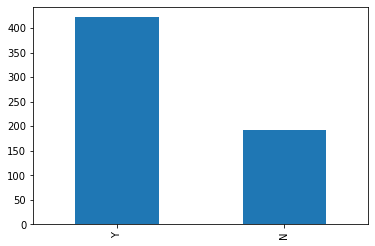

In [17]:
# Bar plot: We can visualize the frequency table using a bar plot.
train['Loan_Status'].value_counts().plot.bar()
plt.show()

From the above analysis, we can see that:
* The loan of 422 (68.7%) people out of 614 was approved.
* The loan of 192 (31.2%) people out of 614 was not approved.

We will now visualize each variable separately. In our dataset we have categorical, ordinal and numerical features. 
* **Categorical:** These features have categories (Gender, Married, Self_Employed, Credit_History, Loan_Status).  
* **Ordinal:** These categorical features have some order involved (Dependents, Education, Property_Area).  
* **Numerical:** These features have numerical values (ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term).

**Visualizing independent variables (4 categorical variables)**

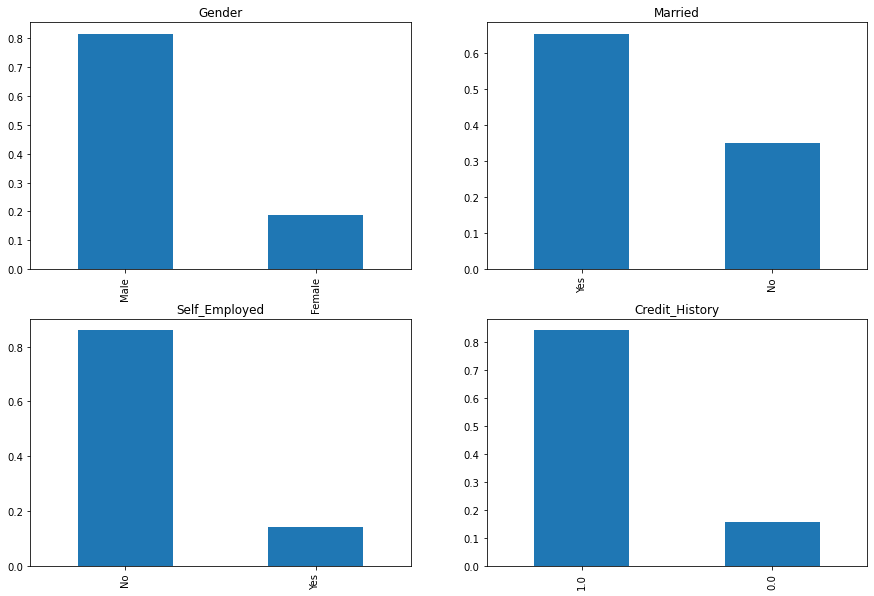

In [48]:
plt.figure(1)

plt.subplot(221)
train['Gender'].value_counts(normalize = True).plot.bar(figsize = (15, 10), title = 'Gender')

plt.subplot(222)
train['Married'].value_counts(normalize = True).plot.bar(title = 'Married')

plt.subplot(223)
train['Self_Employed'].value_counts(normalize = True).plot.bar(title = 'Self_Employed')

plt.subplot(224)
train['Credit_History'].value_counts(normalize = True).plot.bar(title = 'Credit_History')

plt.show()

We can infer the following from the above bar plots.  
* About 80% of applicants are male.  
* About 65% of applicants are married.  
* About 15% of applicants are self-employed.  
* About 85% of applicants have repaid their loan debts.

**Visualizing independent variables (3 ordinal variables)**

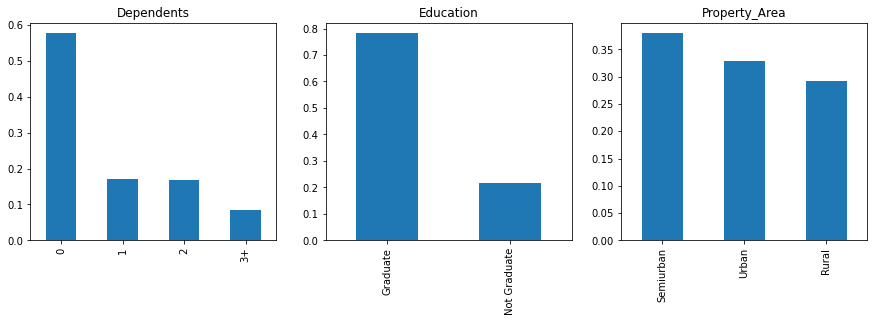

In [55]:
plt.figure(1)

plt.subplot(131)
train['Dependents'].value_counts(normalize = True).plot.bar(figsize = (15, 4), title = 'Dependents')

plt.subplot(132)
train['Education'].value_counts(normalize = True).plot.bar(title = 'Education')

plt.subplot(133)
train['Property_Area'].value_counts(normalize = True).plot.bar(title = 'Property_Area')

plt.show()

We can infer the following from the above bar plots.  
* About 57% of applicants do not have any dependents.  
* About 78% of applicants are graduates.  
* About 38% of applicants from semiurban areas and about 30% each from urban and rural areas.  

**Visualizing independent variables (4 numerical variables)**  
ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term

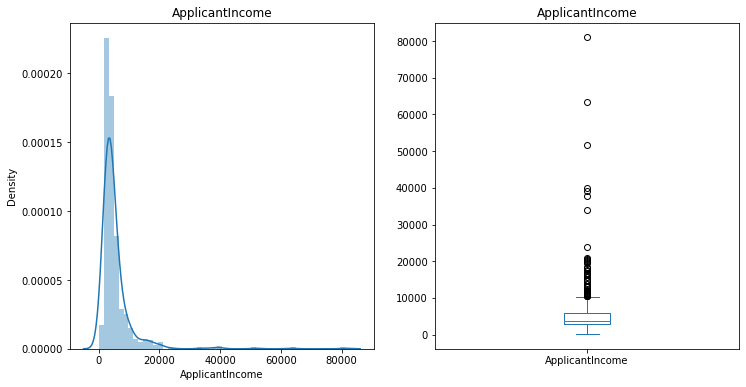

In [80]:
# Distribution of ApplicantIncome
plt.figure(1)

plt.subplot(121)
sns.distplot(train['ApplicantIncome']).set(title = 'ApplicantIncome');


plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize = (12,6), title = 'ApplicantIncome')

plt.show()

-- We can infer from the above distribution plot that the distribution of ApplicantIncome is right skewed and normally distributed.  
-- ML algorithms work better with normally distributed data so we will try to make ApplicantIncome normally distributed before using them for ML algorithms.  
-- The box plot shows us that the data has many outliers because of which the distribution plot is right skewed. This can be attributed to the income disparity in the society. We are also looking at people with different educational levels and separating their educational levels would give us a better idea.

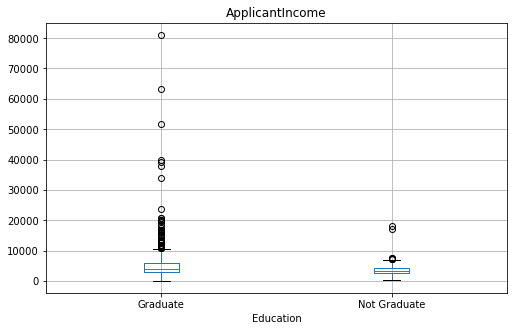

In [77]:
# Separating educational levels
train.boxplot(column = 'ApplicantIncome', by = 'Education', figsize = (8,5))
plt.suptitle("")
plt.show()

We can infer from the above plot that there are higher # of graduates with very high income which appear to be outliers.

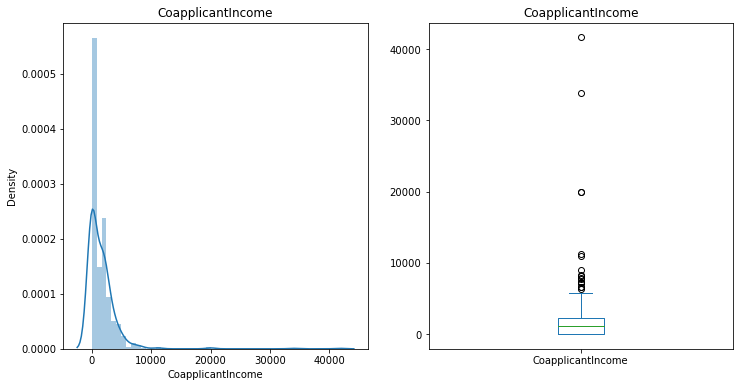

In [82]:
# Distribution of CoapplicantIncome
plt.figure(1)

plt.subplot(121)
sns.distplot(train['CoapplicantIncome']).set(title = 'CoapplicantIncome');

plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize = (12,6), title = 'CoapplicantIncome')

plt.show()

-- We can see that distribution of CoapplicantIncome is very similar to that of ApplicantIncome.  
-- Majority of CoapplicantIncome ranges from 0 to 5000.  
-- There are outliers as well.  
-- CoapplicantIncome is also right skewed and not normally distributed.

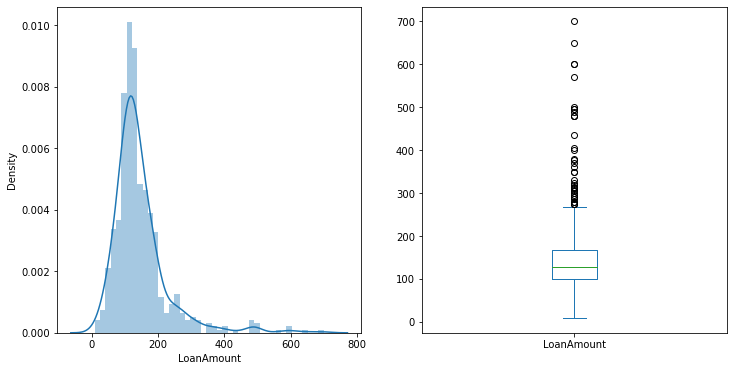

In [83]:
# Distribution of LoanAmount
plt.figure(1)

plt.subplot(121)
sns.distplot(train['LoanAmount']);

plt.subplot(122)
train['LoanAmount'].plot.box(figsize = (12,6))

plt.show()

There are a lot of outliers in LoanAmount variable as well. The distribution is right skewed but fairly normal.

*We would like to know now how well each feature correlates with Loan_Status and this can be done thru bivariate analysis.*

### Bivariate analysis


6. Missing value and outlier treatment
7. Evaluation Metrics for classification problems
8. Model building: Part I
9. Logistic Regression using stratified k-folds cross validation
10. Feature Engineering  
11. Model building: Part II  
  * Logistic Regression  
  * Decision Tree  
  * Random Forest  
  * XGBoost